**`MAFOGOUM CHENDJOU ORNELA GEMIMA`**, `18E2273` et `gemima.mafogoum@facsciences-uy1.cm` 

Department of Physics - Faculty of Science - University of Yaoundé I

`BIOPHYSIQUE (PMB)`

`Lundi,10juillet 2023`

Le **2,5,8,11-tétrakis(4-(9H-carbazol-9-yl)phényle)-6,7-diisopropylnéryl-1,4,5,8,9,11-hexaazatriphénylène** ou 4CzIPN, est repertorié dans la base de donnée PubChem comme le composé 102198498.

Cette molécule présente des propriétés intéressantes pour les applications OLED en raison de sa haute efficacité lumineuse, de sa longue durée de vie et de sa stabilité thermique. Elle a été largement utilisée dans les écrans OLED pour les téléviseurs, les smartphones et les ordinateurs portables en raison de ses performances optimales et de sa faible consommation d'énergie.

1. A partir de site de [pubchem](https://pubchem.ncbi.nlm.nih.gov/compound/102198498), donner, **dans votre cahier de composition**, sa formule moléculaire et son poids moléculaire.
2. Utiliser `rdkit.Chem.MolFromSmiles` et `rdkit.Chem.AllChem` pour représenter en 2D, y compris explicitement les atomes d'hydrogènes, la molécule 4CzIPN à partir de son SMILES isomérique, disponible sur [pubchem](https://pubchem.ncbi.nlm.nih.gov/compound/102198498). 
3. Utiliser `rdkit.Chem.Descriptors` pour évaluer les propriétés physico-chimique suivantes de la molécule 4CzIPN : le poids moléculaire; poids moléculaire moyen de la molécule en ignorant les hydrogènes; logP ou solubilité, TPSA ou la polarité, nombre de liaisons donneurs d'hydrogènes  et nombre de liaisons accepteurs d'hydrogènes. Utiliser `pandas`pour présenter les résulats sous forme de tableau. **Noter les valeurs obtenues dans votre cahier de composition.**
4. Utiliser `rdkit.Chem.AllChem` et `rdkit.Chem.MolToXYZFile` pour écrire, à partir de `mol` (molécule rdkit) de la question 2. dans un fichier `"votre_nom_4CzIPN.xyz"`, les coordonnées au format xyz de la molécule 4CzIPN. 
   
   ```python
    rdkit.Chem.AllChem.EmbedMolecule(mol)
    rdkit.Chem.AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
    rdkit.Chem.MolToXYZFile(mol, 'votre_nom_4CzIPN.xyz')
    ```

5. Ouvrir le fichier créé et **noter dans votre cahier de composition, le chiffre se trouvant au début du fichier**. Ensuite l'effacer du fichier et sauvegarder celui-ci.
6. Utiliser `pyscf.gto` pour créer 
   
   ```python
   CzIPN_mol = pyscf.gto.M(atom=open('votre_nom_4CzIPN.xyz').read(),
    charge=0,
    spin=0,
    basis='631g*',
    unit='Angstrom')
    ```

    et par la méthode `CzIPN_mol.build().get_enuc()`, obtenir la valeur de l'énergie nucléaire de la molécule et **noter celle-ci dans votre cahier de composition**.
7. Le Hamiltonien 2-qubits de cette molécule est
\begin{equation*} \mathtt{H} = h_1(\mathtt{I}\otimes\mathtt{I}) + h_2(\mathtt{Z}\otimes\mathtt{I} - \mathtt{I}\otimes\mathtt{Z}) + h_3(\mathtt{Z}\otimes\mathtt{Z}) + h_4(\mathtt{x}\otimes\mathtt{X}) + h_5(\mathtt{X}\otimes\mathtt{I} + \mathtt{I}\otimes\mathtt{X}) + h_6(\mathtt{X}\otimes\mathtt{Z} - \mathtt{Z}\otimes\mathtt{X}),
\end{equation*}
où les coefficients 
\begin{align*}
&h_1 = -0.46959492273396025,&&h_2 = -0.12480163590374627,\\
&h_3 = -0.026903253444563915,&&  h_4 = 0.004924575935052124,\\
&h_5 = -4.6840929608197336e-06,&& h_6 = - 4.683976972721447e-06.
\end{align*}
Utiliser, pour calculer l'état fondamental de la molécule 4CzIPN,
* `qiskit.opflow.operator_globals` et 
* `qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver`.

**Noter dans votre cahier de composition, la valeur propre et le vecteur propre de l'Hamiltonien**.

In [13]:
#### 7. calculons l'etat fondamental de la molecule 

In [17]:
from rdkit import Chem

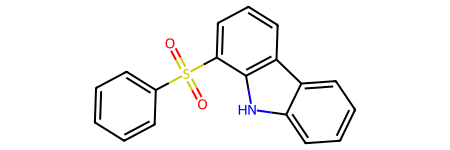

In [4]:
smi = 'C1=CC=C(C=C1)S(=O)(=O)C2=CC=CC3=C2NC4=CC=CC=C34'
m = Chem.MolFromSmiles(smi) # Convert smiles to molecule
m

In [ ]:
##### calculer l'etat fondamentale de la molecule

In [2]:
from qiskit.opflow.operator_globals import I, X, Y, Z
from qiskit.algorithms import NumPyMinimumEigensolver

In [3]:
M = I.tensor(I)
A = Z.tensor(I)-I.tensor(Z)
F = Z.tensor(Z)
O= X.tensor(X)
G = X.tensor(I)+I.tensor(X)-X.tensor(Z)+Z.tensor(X)

In [6]:
𝙷 = -0.46959492273396025*(M) -0.12480163590374627*(A) -0.026903253444563915*(F) +0.004924575935052124*(O) -4.6840929608197336e-06*(G) -4.683976972721447e-06*(O) 
print(H)

-0.46959492273396025 * II
- 0.12480163590374627 * ZI
+ 0.12480163590374627 * IZ
- 0.026903253444563915 * ZZ
+ 0.004924575935052124 * XX
- 4.6840929608197336e-06 * XI
- 4.6840929608197336e-06 * IX
+ 4.6840929608197336e-06 * XZ
- 4.6840929608197336e-06 * ZX
- 4.683976972721447e-06 * XX


In [7]:
exact_result = NumPyMinimumEigensolver().compute_minimum_eigenvalue(H)
print(f'The exact ground state energy is: {exact_result.eigenvalue}')

The exact ground state energy is: -0.6923434248818117


In [ ]:
#### 2. representons cette molecule en 3D

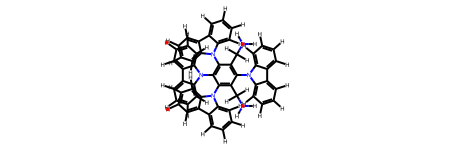

In [52]:
smi = 'C1=CC=C2C(=C1)C3=CC=CC=C3N2C4=C(C(=C(C(=C4CN)N5C6=CC=CC=C6C7=CC=CC=C75)N8C9=CC=CC=C9C1=CC=CC=C18)N1C2=CC=CC=C2C2=CC=CC=C21)CN' 
m = Chem.MolFromSmiles(smi)
m1 = Chem.AddHs(m)
m1

In [ ]:
#### 4.

In [68]:
from rdkit import Chem

In [77]:
rdkit.Chem.AllChem.EmbedMolecule(m1)
rdkit.Chem.AllChem.MMFFOptimizeMolecule(m1, maxIters=200)
rdkit.Chem.MolToXYZFile(m1, 'Mafogoum_4CzIPN.xyz')

In [21]:
### 6.

In [78]:
from pyscf import gto

In [79]:
CzIPN_mol = pyscf.gto.M(atom=open('Mafogoum_4CzIPN.xyz').read(), 
charge=0,
spin=0,
basis='631g*',                       
unit='Angstrom')
CzIPN_mol_problem = CzIPN_mol_driver.run()
CzIPN_mol_hamiltonian = CzIPN_mol_problem.hamiltonian
CzIPN_mol_coeficients = CzIPN_mol_hamiltonian.electronic_integral

IndexError: tuple index out of range

In [15]:
import rdkit
import pyscf
print(rdkit.__version__)
print(pyscf.__version__)

2022.09.5
2.2.1


In [2]:
import qiskit.tools.jupyter
%qiskit_version_table